# Titanic - Machine Learning from Disaster

We are implementing Titanic - Machine Learning from Disaster in this notebook.<br>
Using the dataset available [here](https://www.kaggle.com/c/titanic/data), we will classify whether the passengers survive the disaster or not.<br>


## Problem Definition

Problem definition for Titanic Survival competition is described [here](https://www.kaggle.com/c/titanic/overview) at Kaggle that:<br>

Can our model determine these passengers in the test dataset survived or not knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster. (Given, test dataset doesn't contain the survival information.)<br>

## Overview

The dataset consist of two files mainly:<br>
- training set (train.csv)
- test set (test.csv)

Machine learning models should be built using the training set. The training dataset has outcome (also known as "ground truth") for each passenger. Our model will be based on "features" such as the gender and class of passengers. Feature engineering will be used to build new features.<br>

The test set should be used to examine how well your model performs with data that has never been seen before. The outcome for each passenger is not there in the test set. We will use our model to estimate whether or not each passenger in the test set survived the Titanic's sinking.<br>

## Data

**survival:**	Survival	[0 = No, 1 = Yes]<br>
**pclass:**	Ticket class	[1 = 1st, 2 = 2nd, 3 = 3rd]<br>
**sex:**	Sex	<br>
**Age:**	Age in years	<br>
**sibsp:**	# of siblings / spouses aboard the Titanic	<br>
**parch:**	# of parents / children aboard the Titanic	<br>
**ticket:**	Ticket number	<br>
**fare:**	Passenger fare	<br>
**cabin:**	Cabin number	<br>
**embarked:**	Port of Embarkation [C = Cherbourg, Q = Queenstown, S = Southampton]<br>

In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## Importing... the dataset

In [6]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine_df = [train_df, test_df]
combine_df

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

## Data Exploration

In [7]:
print("Columns in dataset are : \n",train_df.columns.values)

Columns in dataset are : 
 ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.info()
print('\n','='*40,'\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Searching for duplicate values.**

In [10]:
duplicate = train_df[train_df.duplicated()]
if duplicate.shape[0] == 0 :
    print("Dataset has no duplicate values.")
else :
    print("Dropping duplicates in data.")
    train_df.drop_duplicates(inplace=True)
    print("Duplicate Rows :")
    duplicate

Dataset has no duplicate values.


**Checking is there's missing values**

In [11]:
print(train_df.isnull().sum())
print("\nIn Training dataset :\nThere are {0} null values in column 'Age'\nThere are {1} null values in column 'Cabin'\nAnd {2} in Embarked".
      format(train_df.isnull().sum()[5],train_df.isnull().sum()[10],train_df.isnull().sum()[11]))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In Training dataset :
There are 177 null values in column 'Age'
There are 687 null values in column 'Cabin'
And 2 in Embarked


In [12]:
print(test_df.isnull().sum())
print("\nIn Test dataset :\nThere are {0} null values in column 'Age'\nThere are {1} null values in column 'Cabin'".
      format(test_df.isnull().sum()[4],test_df.isnull().sum()[9]))

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In Test dataset :
There are 86 null values in column 'Age'
There are 327 null values in column 'Cabin'


**Let's see graph of people survived with respect to age.**

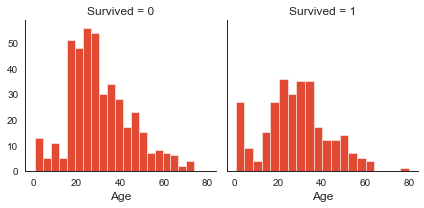

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Data Preprocessing

In [14]:
for dataset in combine_df:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(['Cabin', 'Ticket'], axis=1, inplace = True)

print(train_df.isnull().sum())
print("-"*10)
print(test_df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [15]:
for dataset in combine_df:
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

     #initialize to yes/1 is alone
    dataset['IsAlone'] = 1

    # update to no/0 if family size is greater than 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

stat_min = 10
title_names = (train_df['Title'].value_counts() < stat_min)

train_df['Title'] = train_df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train_df['Title'].value_counts())
print("-"*10)

#preview data again
train_df.info()
test_df.info()
train_df.sample(10)


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
Ra

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
724,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,53.1000,S,2,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,C,1,1,Misc,"(14.454, 31.0]","(32.0, 48.0]"
234,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
224,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,90.0000,S,2,0,Mr,"(31.0, 512.329]","(32.0, 48.0]"
133,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
315,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,7.8542,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
839,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,29.7000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
722,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
557,0,1,"Robbins, Mr. Victor",male,28.0,0,0,227.5250,C,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S,6,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"


In [16]:
#define y variable aka target/outcome
Target = ['Survived']


# checking correlation with survival of all the variables
for x in train_df:
    if train_df[x].dtype != 'float64' and x != 'Name' and x != 'Survived' :
        print('Survival Correlation by:', x)
        print(pd.crosstab(train_df[x],train_df[Target[0]]))
        print('-'*10, '\n')

Survival Correlation by: Pclass
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
---------- 

Survival Correlation by: Sex
Survived    0    1
Sex               
female     81  233
male      468  109
---------- 

Survival Correlation by: SibSp
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0
---------- 

Survival Correlation by: Parch
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0
---------- 

Survival Correlation by: Embarked
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
---------- 

Survival Correlation by: FamilySize
Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5       

- We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In [17]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


**Checking the data again.**

In [18]:
print('Train columns with null values: \n', train_df.isnull().sum())
print("-"*10)
print (train_df.info())
print("-"*10)

print('Test/Validation columns with null values: \n', test_df.isnull().sum())
print("-"*10)
print (test_df.info())

Train columns with null values: 
 Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
FareBin       0
AgeBin        0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-

## Exploratory Data Analysis

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

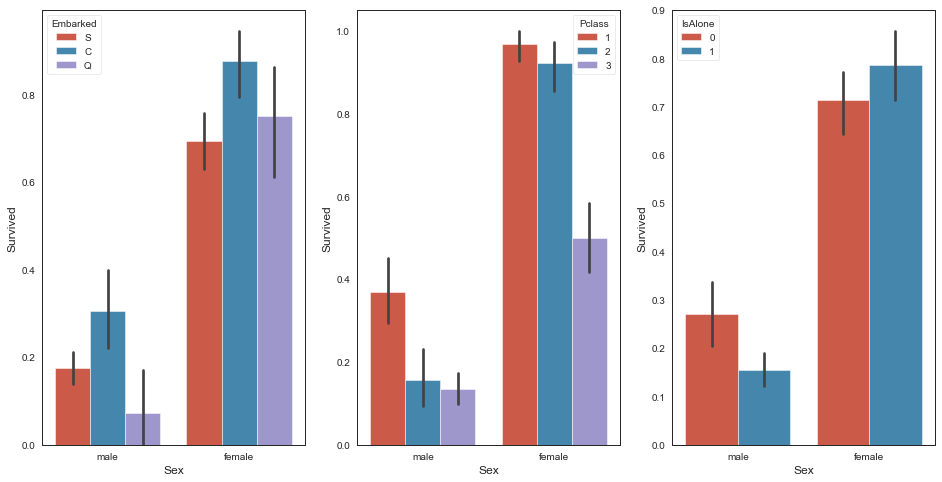

In [19]:
#graph distribution of qualitative data: Sex
fig, qaxis = plt.subplots(1,3,figsize=(16,8))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train_df, ax = qaxis[0])
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train_df, ax  = qaxis[1])
sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=train_df, ax  = qaxis[2])

<AxesSubplot:xlabel='Pclass', ylabel='FamilySize'>

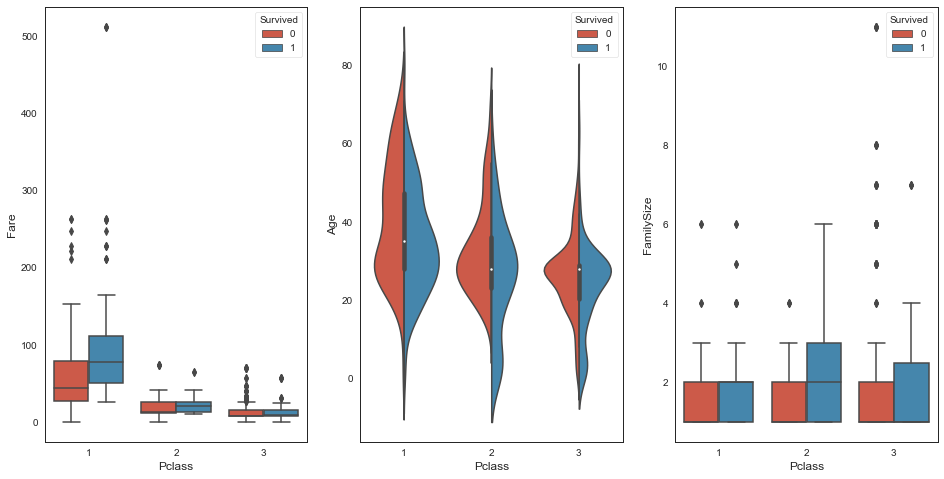

In [20]:
# graph distribution of qualitative data: Pclass
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,8))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_df, ax = axis1)
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train_df, split = True, ax = axis2)
sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train_df, ax = axis3)

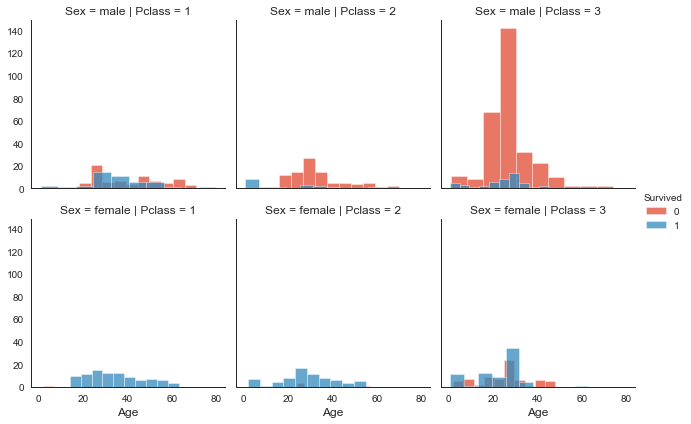

In [21]:
# histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(train_df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = 0.75)
h.add_legend()

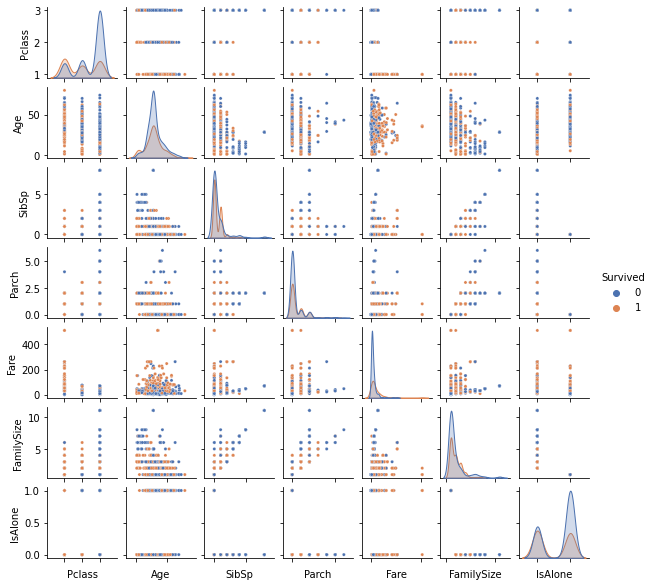

In [18]:
#pair plots of entire dataset
pp = sns.pairplot(train_df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

**Analysing 'Title' varible/column.**

In [22]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Misc'], dtype=object)

In [23]:
for dataset in combine_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for dataset in combine_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine_df:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,1,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,3,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,2,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,3,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,1,"(7.91, 14.454]","(32.0, 48.0]"


In [26]:
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [27]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,1,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0,3,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1,2,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0,3,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1,1,"(7.91, 14.454]","(32.0, 48.0]"


**Convert the Fare feature to ordinal values based on the FareBin.**

In [28]:
for dataset in combine_df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBin'], axis=1)
test_df = test_df.drop(['FareBin'], axis=1)

combine_df = [train_df, test_df]    
train_df.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0,0,2,0,1,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,3,1,2,0,3,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,0,1,1,2,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,0,2,0,3,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,0,1,1,1,"(32.0, 48.0]"
5,0,3,"Moran, Mr. James",0,28.0,0,0,1,2,1,1,1,"(16.0, 32.0]"


**Convert the Age feature to ordinal values based on the AgeBin.**

In [29]:
for dataset in combine_df:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0,2,0,1,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1,2,0,3,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0,1,1,2,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,0,2,0,3,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,0,1,1,1,"(32.0, 48.0]"


In [30]:
train_df = train_df.drop(['AgeBin'], axis=1)
test_df = test_df.drop(['AgeBin'], axis=1)
combine_df = [train_df, test_df]
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1,2,0,3
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0,1,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,0,2,0,3
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,0,1,1,1


In [31]:
for dataset in combine_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,0,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,0,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,1,2,1,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,1,0,3,0,3


Correlation Plot of the Heat Failure Prediction


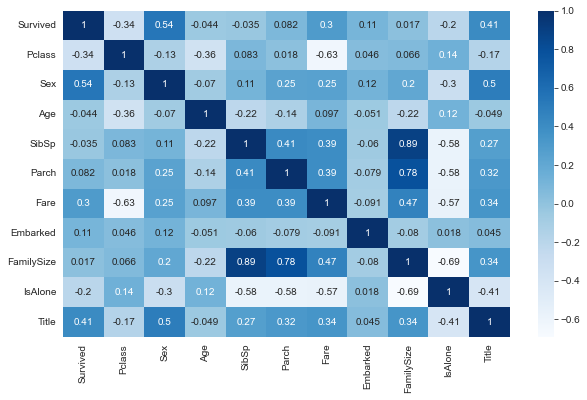

In [33]:
corr = train_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True,cmap='Blues')
print("Correlation Plot of the Heat Failure Prediction")

In [34]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine_df = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [35]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,2,0,3
2,894,2,0,3,0,0,1,2,1,1,1
3,895,3,0,1,0,0,1,0,1,1,1
4,896,3,1,1,1,1,1,0,3,0,3


In [36]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,2,0,3
2,894,2,0,3,0,0,1,2,1,1,1
3,895,3,0,1,0,0,1,0,1,1,1
4,896,3,1,1,1,1,1,0,3,0,3


## Splitting train and test data.

In [37]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [38]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,0,1,1,0,0,0,2,0,1
1,1,1,2,1,0,3,1,2,0,3
2,3,1,1,0,0,1,0,1,1,2
3,1,1,2,1,0,3,0,2,0,3
4,3,0,2,0,0,1,0,1,1,1


## Let's make predictions

In [39]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [40]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.168883
9,Title,0.469227
6,Embarked,0.224206
5,Fare,0.211667
4,Parch,-0.019611
3,SibSp,-0.279694
7,FamilySize,-0.299041
8,IsAlone,-0.502029
2,Age,-0.581529
0,Pclass,-0.885850


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [41]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.39

In [42]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.59

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.52

In [44]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.7

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.8

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. 

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

64.76

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

In [47]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.23

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.23

## Model evaluation.

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.23
8,Decision Tree,89.23
1,KNN,85.52
0,Support Vector Machines,83.39
7,Linear SVC,81.59
2,Logistic Regression,81.37
6,Stochastic Gradient Decent,80.70
4,Naive Bayes,79.80
5,Perceptron,64.76


In [50]:
result_submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [54]:
result_submission.to_csv('Titanic_ML_from_Disaster.csv')

89.23 % is good enough for our first attempt. Any suggestions to improve our score are most welcome.<br>
🛠 Work in progress... I am trying to improve the accuracy with hyperparameter tuning and feature extraction.<br> 
If you liked it so far, please don't forget to comment and upvote. Thank you!<br>
All the best🤘<br>